In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
from statsmodels.tsa.arima_process import arma_generate_sample

#### Example of AR(2) model

In [26]:
np.random.seed(101)
arparams=np.array([0.75, -0.25])    
maparams=np.array([0.,0.])  
ar=np.r_[1,-arparams] # we have to negate the AR coefficient and add 1 to the lis of parameters
ma=np.r_[1,maparams]  # we only add 1 to the list of MA parameters
y=arma_generate_sample(ar,ma,2000)
df=pd.DataFrame(y,columns=['AR(2) samples'])


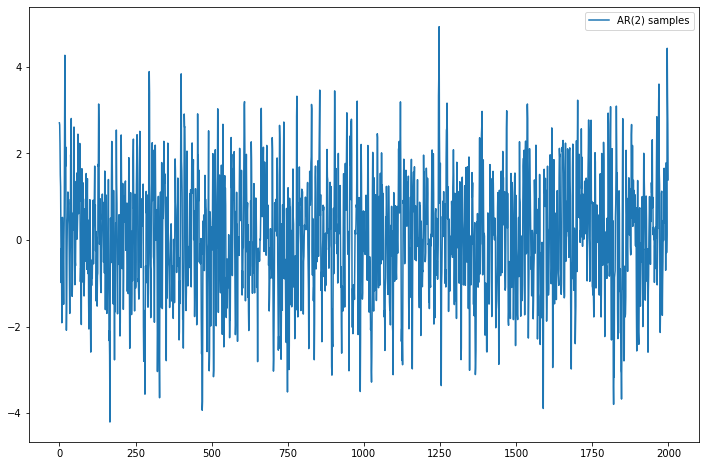

In [27]:
plt.rc("figure", figsize=(12,8))
df.plot();

#### ACF decays and PACF cuts off at the second lag

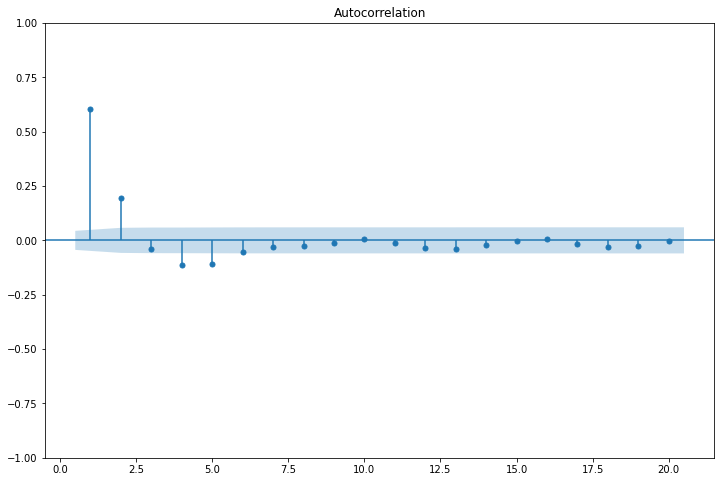

In [28]:
fig=plot_acf(df,lags=20,zero=False)

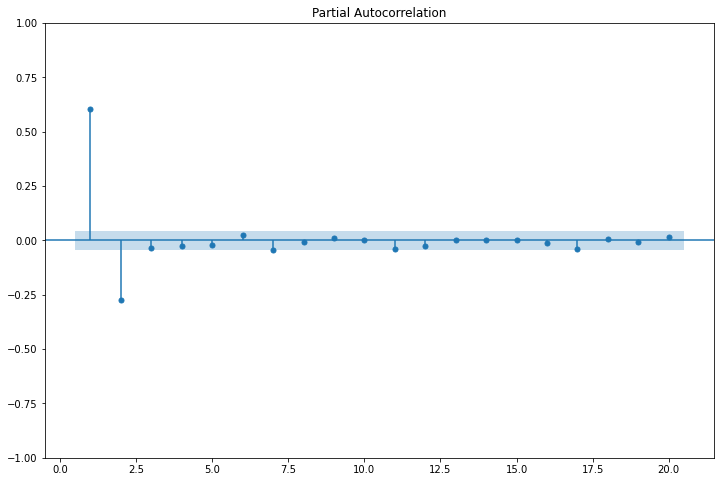

In [29]:
fig=plot_pacf(df,lags=20,zero=False,method='ywm')

#### Let us construct three autoregressive models AR(1), AR(2), and AR(3).  We will analyze the values of AIC/BIC .

In [30]:
model1=ARIMA(df,order=(1,0,0)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AR(2) samples   No. Observations:                 2000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2993.660
Date:                Mon, 11 Apr 2022   AIC                           5993.320
Time:                        18:53:56   BIC                           6010.122
Sample:                             0   HQIC                          5999.489
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0777      0.061      1.266      0.206      -0.043       0.198
ar.L1          0.6071      0.017     34.703      0.000       0.573       0.641
sigma2         1.1683      0.037     31.523      0.000       1.096       1.241
===================================================================================
Ljung-Box (L1) (Q):                  55.23   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.00   Prob(JB):                         0.94
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model2=ARIMA(df,order=(2,0,0)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AR(2) samples   No. Observations:                 2000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2914.998
Date:                Mon, 11 Apr 2022   AIC                           5837.997
Time:                        18:53:57   BIC                           5860.400
Sample:                             0   HQIC                          5846.223
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.046      1.624      0.104      -0.016       0.166
ar.L1          0.7737      0.022     35.352      0.000       0.731       0.817
ar.L2         -0.2755      0.022    -12.583      0.000      -0.318      -0.233
sigma2         1.0798      0.034     31.946      0.000       1.014       1.146
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.66   Prob(JB):                         0.90
Heteroskedasticity (H):               0.98   Skew:                             0.01
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model3=ARIMA(df,order=(3,0,0)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AR(2) samples   No. Observations:                 2000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2913.815
Date:                Mon, 11 Apr 2022   AIC                           5837.630
Time:                        18:53:57   BIC                           5865.635
Sample:                             0   HQIC                          5847.913
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0748      0.045      1.673      0.094      -0.013       0.163
ar.L1          0.7642      0.023     33.840      0.000       0.720       0.808
ar.L2         -0.2489      0.028     -8.955      0.000      -0.303      -0.194
ar.L3         -0.0345      0.023     -1.507      0.132      -0.079       0.010
sigma2         1.0786      0.034     31.985      0.000       1.012       1.145
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.95   Prob(JB):                         0.87
Heteroskedasticity (H):               0.98   Skew:                             0.01
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### The log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset. The log-likelihood value for a given model can range from negative infinity to positive infinity. The actual log-likelihood value for a given model is mostly meaningless, but it’s useful for comparing two or more models. In practice, we often fit several regression models to a dataset and choose the model with the highest log-likelihood value as the model that fits the data best. When calculating log-likelihood values, it’s important to note that adding more predictor variables to a model will almost always increase the log-likelihood value even if the additional predictor variables aren’t statistically significant. This means you should only compare the log-likelihood values between two regression models if each model has the same number of predictor variables. To compare models with different numbers of predictor variables, you can perform a likelihood-ratio test to compare the goodness of fit of two nested regression models.


In [33]:
from scipy.stats.distributions import chi2

In [34]:
def LLR_test(m1,m2,DF=1):
    L1=m1.llf
    L2=m2.llf
    LR=2*(L2-L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [35]:
LLR_test(model1,model2)

0.0

In [36]:
LLR_test(model2,model3)

0.124

### Analysis of residuals

#### The residuals of a good model should be a white noise, Certainly it is not the case for our AR(1) fit.

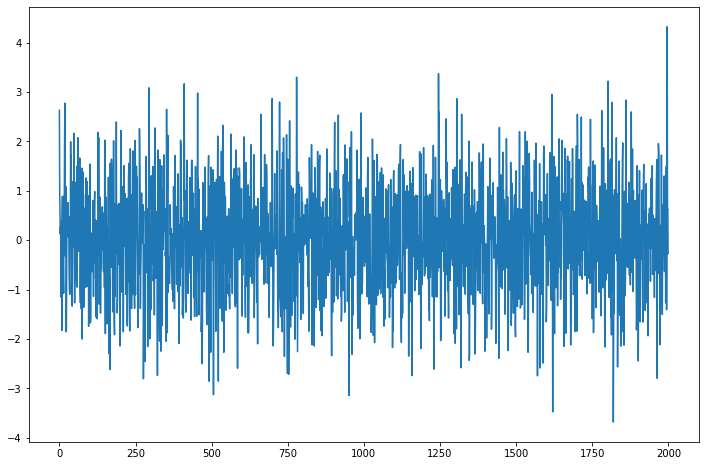

In [37]:
plt.plot(model1.resid);

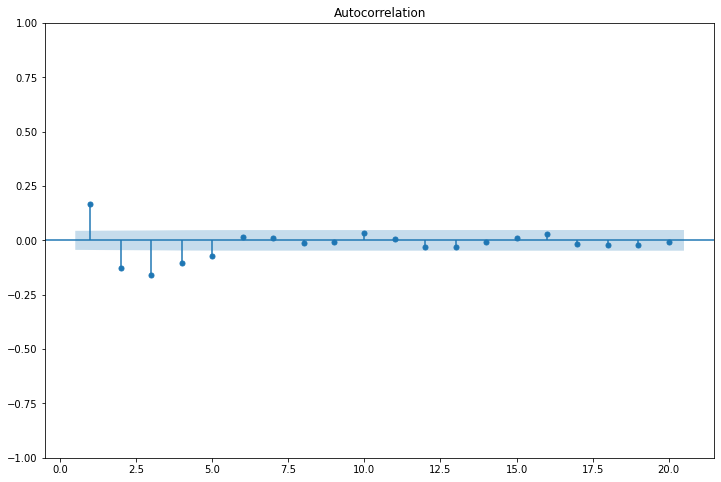

In [38]:
fig=plot_acf(model1.resid,lags=20, zero=False)

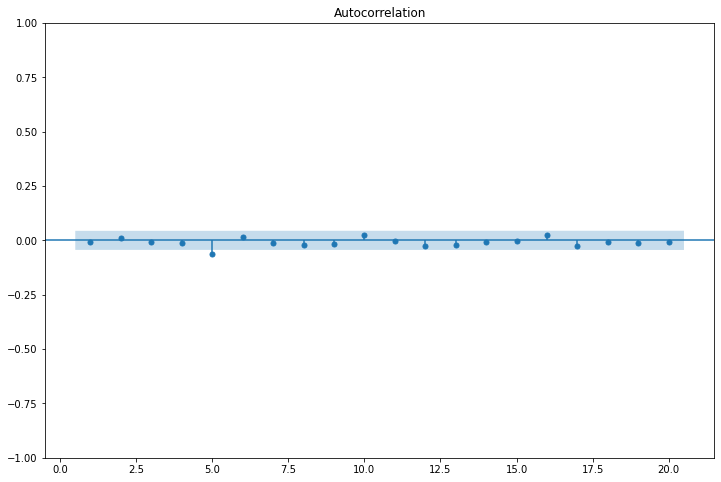

In [39]:
fig=plot_acf(model2.resid,lags=20, zero=False)

In [40]:
acorr_ljungbox(model2.resid,lags=20,return_df=True)

,lb_stat,lb_pvalue
1,0.182694,0.669069
2,0.472377,0.789632
3,0.637995,0.887682
4,0.894642,0.925328
5,8.378816,0.136557
6,8.902763,0.179121
7,9.118026,0.244293
8,10.182563,0.252446
9,10.859893,0.285435
10,11.889056,0.292550
